# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


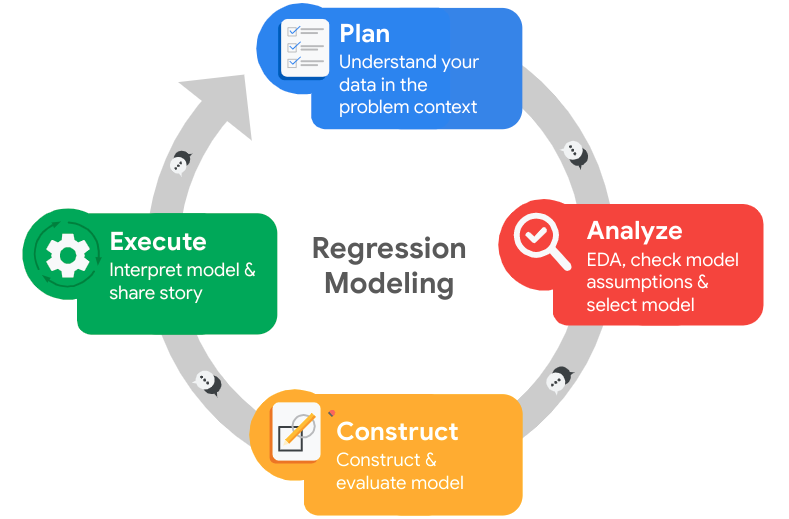

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Company leadership at Salifort Motors

2. To predict employee turnover and the factors that contribute to this. Overall goal is to help the company increase employee retention and job satisfaction for current employees, and save money and time looking for and training new employees. 

3. The data consists of 10 variables and 14,999 rows. Two variables are float, six variables are int64 and two variables are object. Three of the int64 variables are binary. The 'department' variable is categorical with 10 possible groups. The 'salary' variable is categorical with 3 possible groups. The dataset containted duplicate rows but it was decided not to remove these rows as these rows were not complete copies of each other. The shared the same values for certain, not all, variables. The dataset also contained outliers. These were not managed as the model built is resilient to outliers. Average satisfaction score was 61.28%. The average last evaluation score was 71.61%. The average time spent in the company was approximately 3.5 years. About 24% of employees surveyed had left the company.

4. VC Code to complete the Jupyter notebook, Google Docs, Google Slides, Tableau Public desktop 

5. It is important to consider the effects of the model making mistakes. In predicting a false negative, the model will misidentify an employee as one who will stay in the company when they will actually leave the company, and the company will loose employees without knowing why. In predicting a false positive, the model will misidentify an employees as one who will leave the company when in fact they wont. Any programmes targeting the false positive population could lead to negative financial impacts on the company.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("//Users/aronrana/Documents/Google Coursera/Google Advanced Data Analytics/Course_7/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
df0['Department'].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df0['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [6]:
df0['Work_accident'].value_counts(normalize=True)

Work_accident
0    0.85539
1    0.14461
Name: proportion, dtype: float64

In [7]:
df0['Department'].groupby(by=df0['left']).value_counts(normalize=True)

left  Department 
0     sales          0.273539
      technical      0.177021
      support        0.146482
      IT             0.083479
      product_mng    0.061603
      RandD          0.058278
      marketing      0.057315
      accounting     0.049265
      management     0.047165
      hr             0.045852
1     sales          0.283954
      technical      0.195183
      support        0.155419
      IT             0.076449
      hr             0.060207
      accounting     0.057127
      marketing      0.056847
      product_mng    0.055447
      RandD          0.033884
      management     0.025483
Name: proportion, dtype: float64

In [8]:
df0['salary'].groupby(by=df0['left']).value_counts(normalize=True)

left  salary
0     low       0.450123
      medium    0.448810
      high      0.101068
1     low       0.608233
      medium    0.368804
      high      0.022963
Name: proportion, dtype: float64

### Gather descriptive statistics about the data

In [9]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all') 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [10]:
# Display all column names
### YOUR CODE HERE ###
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.columns = df0.columns.str.replace(r'[\s\-]+', '_', regex=True).str.lower()
df0 = df0.rename(columns = {'number_project':'number_of_projects', 
                            'average_montly_hours':'average_monthly_hours', 
                            'time_spend_company':'time_spent_in_company',
                            'left':'left_company',
                            'promotion_last_5years':'promotion_in_last_5_years',
                            'satisfaction_level':'satisfaction_score',
                            'last_evaluation':'last_evaluation_score'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_score', 'last_evaluation_score', 'number_of_projects',
       'average_monthly_hours', 'time_spent_in_company', 'work_accident',
       'left_company', 'promotion_in_last_5_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [12]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_score           0
last_evaluation_score        0
number_of_projects           0
average_monthly_hours        0
time_spent_in_company        0
work_accident                0
left_company                 0
promotion_in_last_5_years    0
department                   0
salary                       0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [13]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

np.int64(3008)

In [14]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicates = df0[df0.duplicated(keep=False)]
duplicates



,satisfaction_score,last_evaluation_score,number_of_projects,average_monthly_hours,time_spent_in_company,work_accident,left_company,promotion_in_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0_dropped_duplicates = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0_dropped_duplicates.head(10) 

,satisfaction_score,last_evaluation_score,number_of_projects,average_monthly_hours,time_spent_in_company,work_accident,left_company,promotion_in_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [16]:
dropped_duplicates = len(df0) - len(df0_dropped_duplicates)
print('Number of duplicate rows dropped = ', str(dropped_duplicates))

Number of duplicate rows dropped =  3008


### Check outliers

Check for outliers in the data.

<Axes: xlabel='time_spent_in_company'>

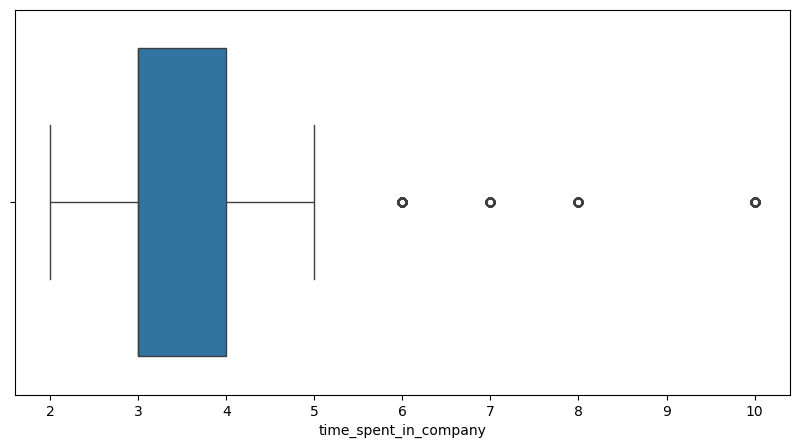

In [17]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(10, 5))
sns.boxplot(data=df0_dropped_duplicates, x='time_spent_in_company',showfliers=True)



In [18]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q1 = np.percentile(df0_dropped_duplicates['time_spent_in_company'], 25)
q3 = np.percentile(df0_dropped_duplicates['time_spent_in_company'], 75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

outliers = df0_dropped_duplicates[(df0_dropped_duplicates['time_spent_in_company'] < lower_limit) | (df0_dropped_duplicates['time_spent_in_company'] > upper_limit)]

len(outliers)


824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Observations
   - Employees who left had a lower average satisfaction score and higher average monthly working hours than those who remained in the company.
   - Ratio of employees who left the company to employees who stayed was roughly equal amongst all the departments at less than 20%.
   - Employees who left the company worked, on average, longer hours per month than employees who stayed. 
   - Employees who stayed in the company had no more than 6 projects and worked an average of less than 200 hours per month or less. Employees who left the company worked the same amount of projects as those who stayed, but but worked for longer hours. All employees who were assigned 7 projects left the company. One group of employees had few projects and worked a low number of hours per month; these employees were fired. The group with the remaining employees consisted of overworked employees who quit. 
   - Employees who left the company comprised of two groups:
      - employees who worked relatively low hours per month and had a low evaluation score
      - employees who worked long work hours and had high evaluation scores 
   - Some employees who left the company worked an average of 240-315 hours per month, explaining their very low satisfaction score. Another group of employees who left the company worked 130-160 hours per month but still had a low satisfaction score. The third group of employees who left the company worked 220-280 hours per month but had a relatively high satisfaction score in comparison to the other two groups. The shape of the distribution of this third group on the scatter plot shows signs of manipulated data. 
   - Employees who left the company had a relatively short tenure of 6 or less years. One group of employees who left had tenures between 2-4 year and had low satisfaction scores, while the other group had tenures between 5-6 years and had high satisfaction scores. Employees who had long tenures of 7 or more years all stayed in the company.
   - Salary distribution of long tenure employees was not disproportionately comprised of the high salary category.
   - There were very few employees who got promoted. Of these promoted employees, very few left. A large majority of employees who left the company did not get a promotion and worked long hours
   - 'last_evaluation_score', 'average_monthly_hours' and 'number_of_projects' had a strong correlation. 

2. Approximately 83.4% of employees stayed in the company, and approximately 16.6% left the company.

3. The first transformation made was renaming columns. This was first done by standardizing the column names into snake case to make column names easier to read and follow. Secondly, columns names that were vague were changed to be more descriptive. The second transformation done was encoding of the two categorical variables into numerical data to meet the requirements of the XGBoost model.

4. To preview the data to understand the variables that exist in the dataset, to calculate descriptive statistics to further understand existing variables, plot basic visualizations to understand relationships between variables, to clean and prepare data by fixing typographical errors or removing missing values, and to perform feature engineering. All this is done to choose the right modelling technique and then preparing the data to be used for that specific modelling technique. 

5. VS Code as my IDE, supplied dataset, relevant python modules and functions, GitHub CoPilot

6. You need to be fair and unbiased as you gather your initial impressions of the dataset. Also, you should think of potential issues with the dataset, or the modelling technique further down the line, and the cost/consequences of these issues. You should not lose focus of the business goal. 

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [19]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
a = df0_dropped_duplicates['left_company'].value_counts().round(4)*100

print('Employee numbers')
print(a)

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
b = df0_dropped_duplicates['left_company'].value_counts(normalize=True).round(4)*100
print()
print('Employee percentages')
print(b)

Employee numbers
left_company
0    1000000
1     199100
Name: count, dtype: int64

Employee percentages
left_company
0    83.4
1    16.6
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

<Axes: xlabel='left_company', ylabel='satisfaction_score'>

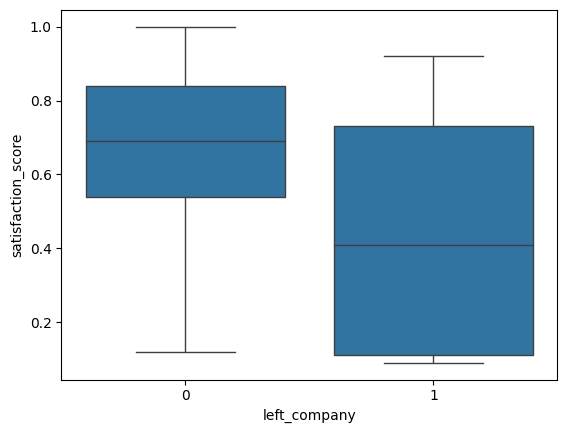

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(x='left_company', y='satisfaction_score', data=df0_dropped_duplicates)

<Axes: xlabel='left_company', ylabel='average_monthly_hours'>

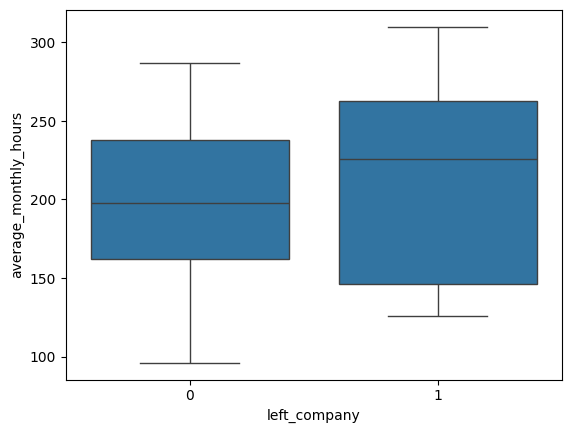

In [21]:
sns.boxplot(x='left_company', y='average_monthly_hours', data=df0_dropped_duplicates)

<Axes: xlabel='left_company', ylabel='last_evaluation_score'>

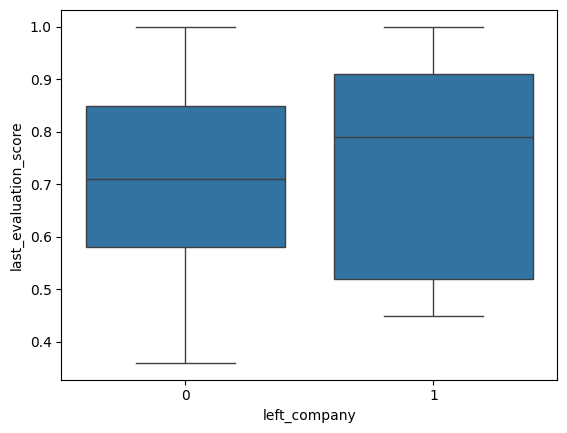

In [22]:
sns.boxplot(x='left_company', y='last_evaluation_score', data=df0_dropped_duplicates)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

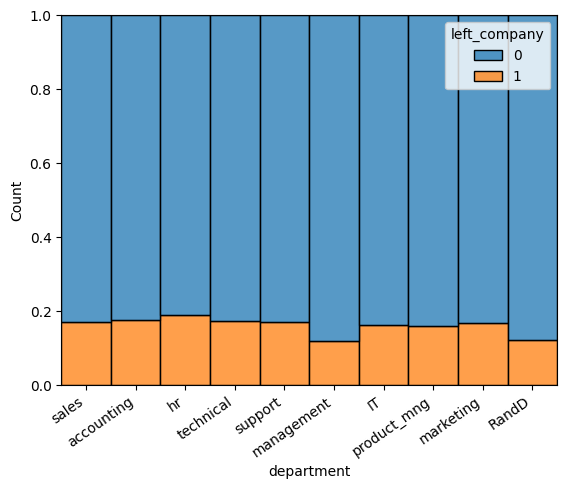

In [23]:
sns.histplot(data = df0_dropped_duplicates, x = 'department', hue = 'left_company', multiple = 'fill')
plt.xticks(rotation=35, horizontalalignment='right')



<Axes: xlabel='salary', ylabel='Count'>

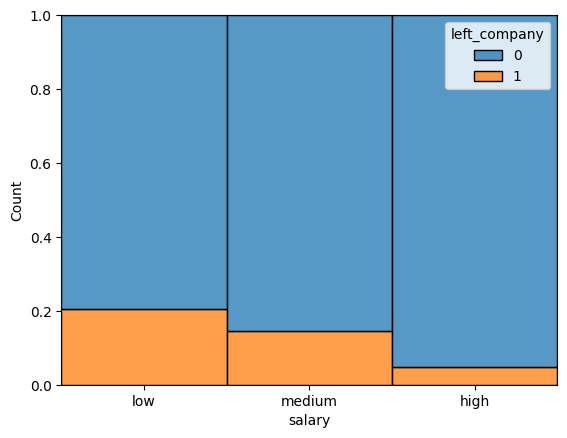

In [24]:
sns.histplot(data = df0_dropped_duplicates, x = 'salary', hue = 'left_company', multiple = 'fill')



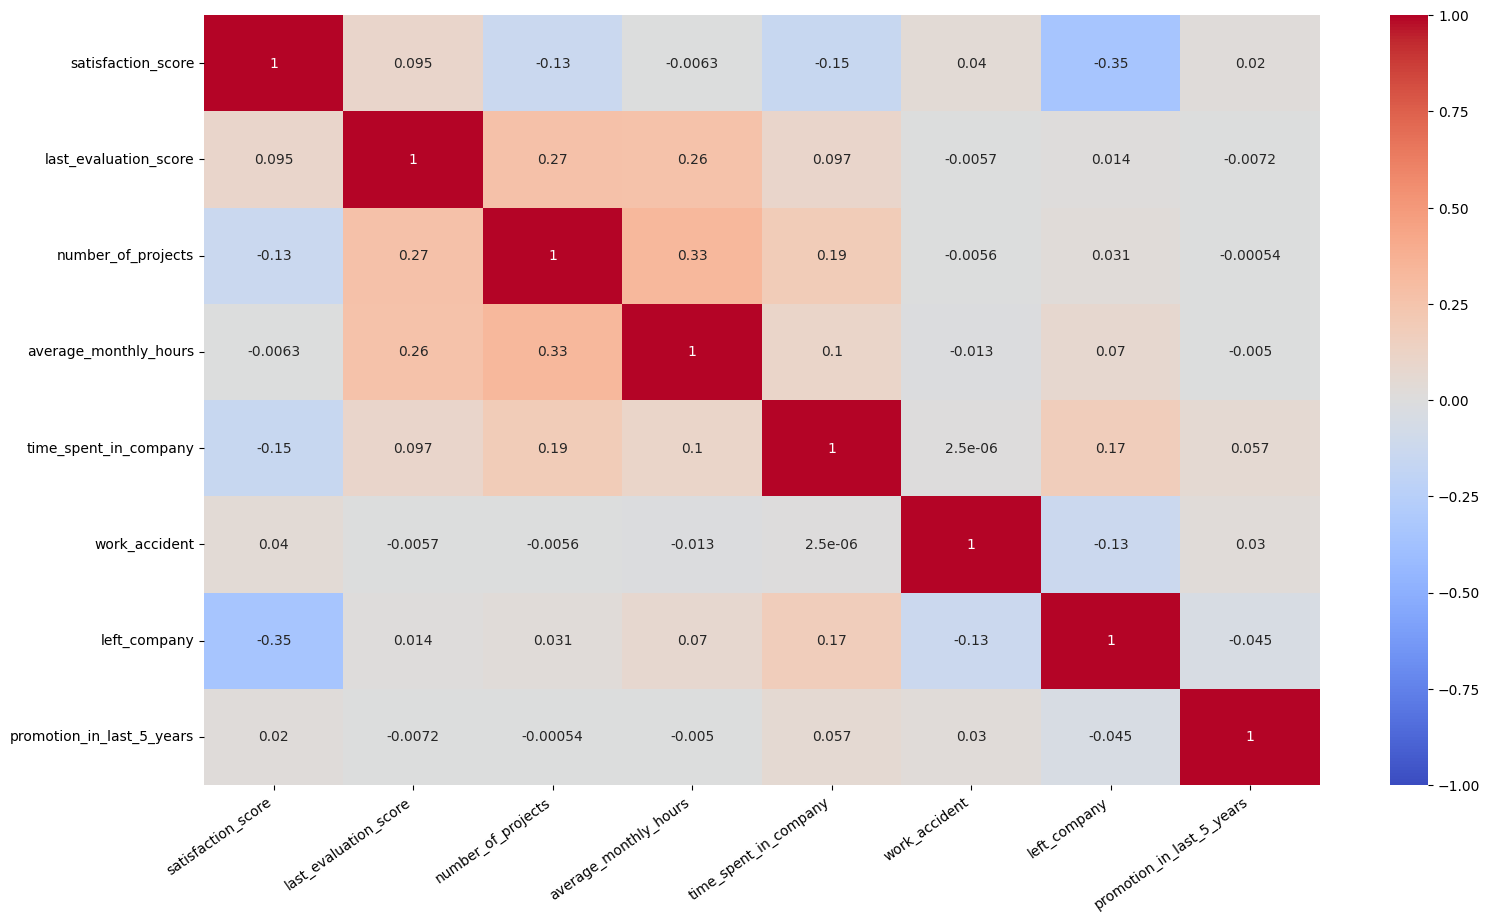

In [25]:
# Select only numeric columns for correlation computation
numeric_df = df0_dropped_duplicates.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(18, 10))
sns.heatmap(numeric_df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.xticks(rotation=35, horizontalalignment='right')
plt.show()

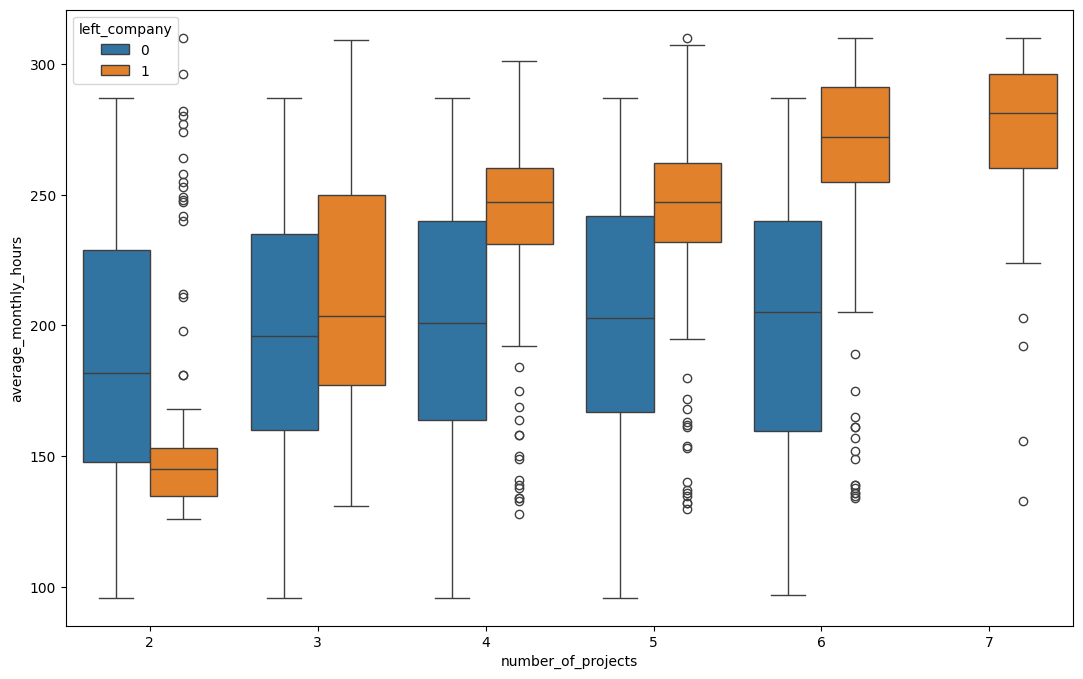

In [26]:
plt.figure(figsize=(13,8))

sns.boxplot(data=df0_dropped_duplicates, x='number_of_projects', y='average_monthly_hours', orient='v', hue='left_company') 


plt.show()


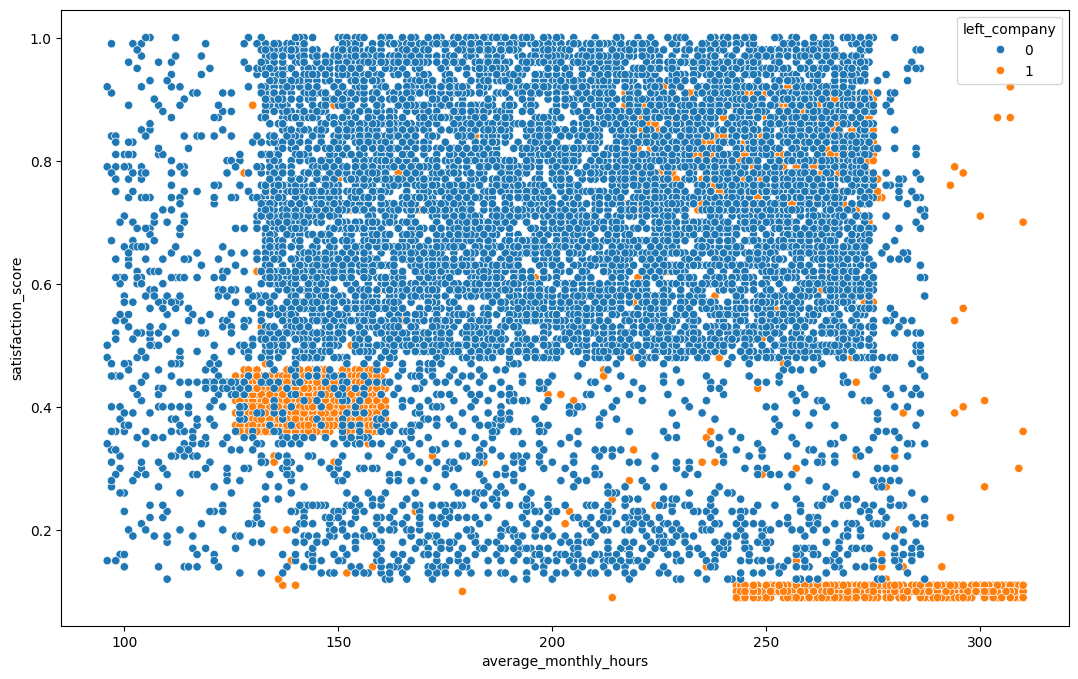

In [27]:
plt.figure(figsize=(13,8))

sns.scatterplot(data=df0_dropped_duplicates, x='average_monthly_hours', y='satisfaction_score', hue='left_company')

plt.show()

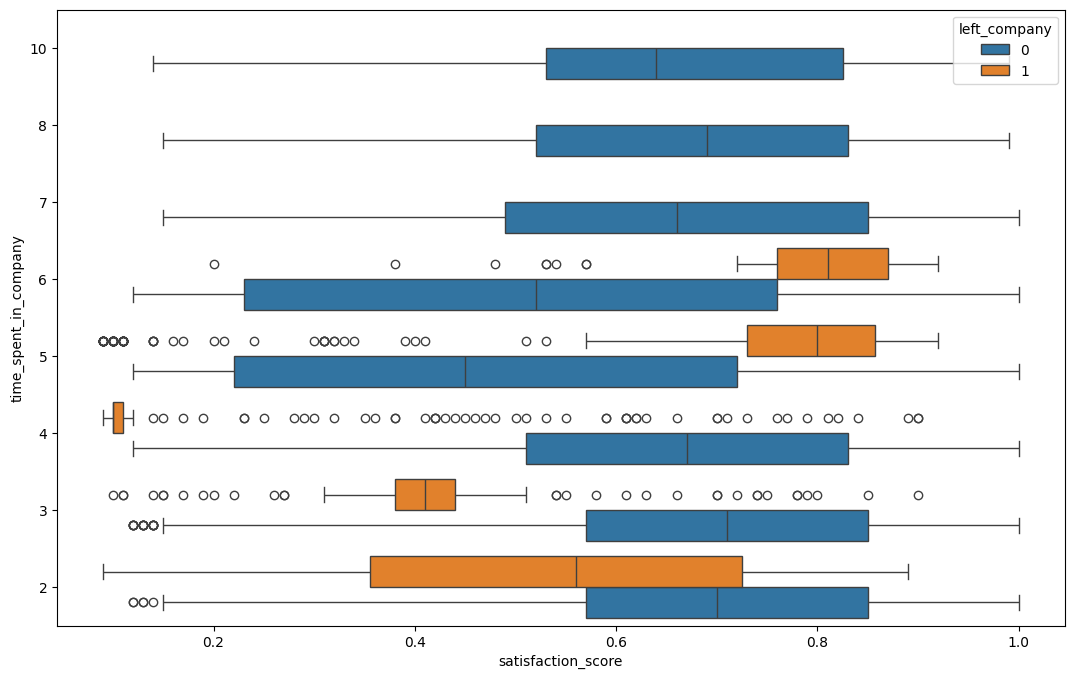

In [28]:
plt.figure(figsize=(13,8))

sns.boxplot(data=df0_dropped_duplicates, x='satisfaction_score', y='time_spent_in_company', orient='h', hue='left_company') 
plt.gca().invert_yaxis()

plt.show()


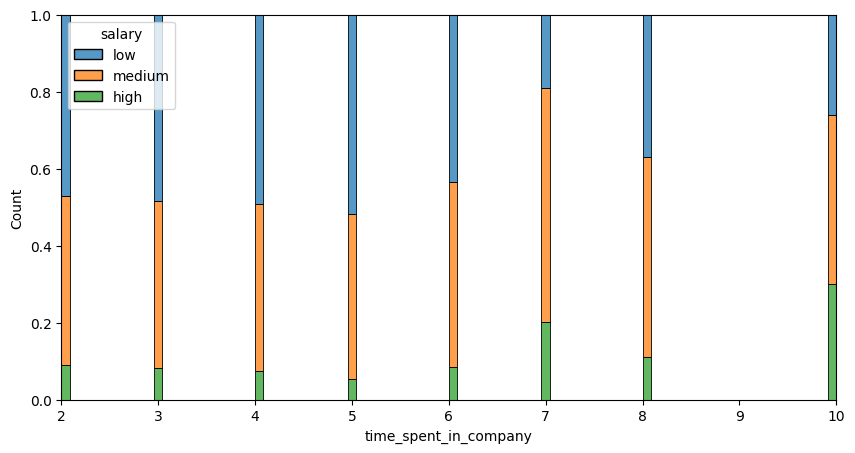

In [29]:
plt.figure(figsize=(10,5))

sns.histplot(data=df0_dropped_duplicates, x = 'time_spent_in_company', hue = 'salary', multiple = 'fill')

plt.show()

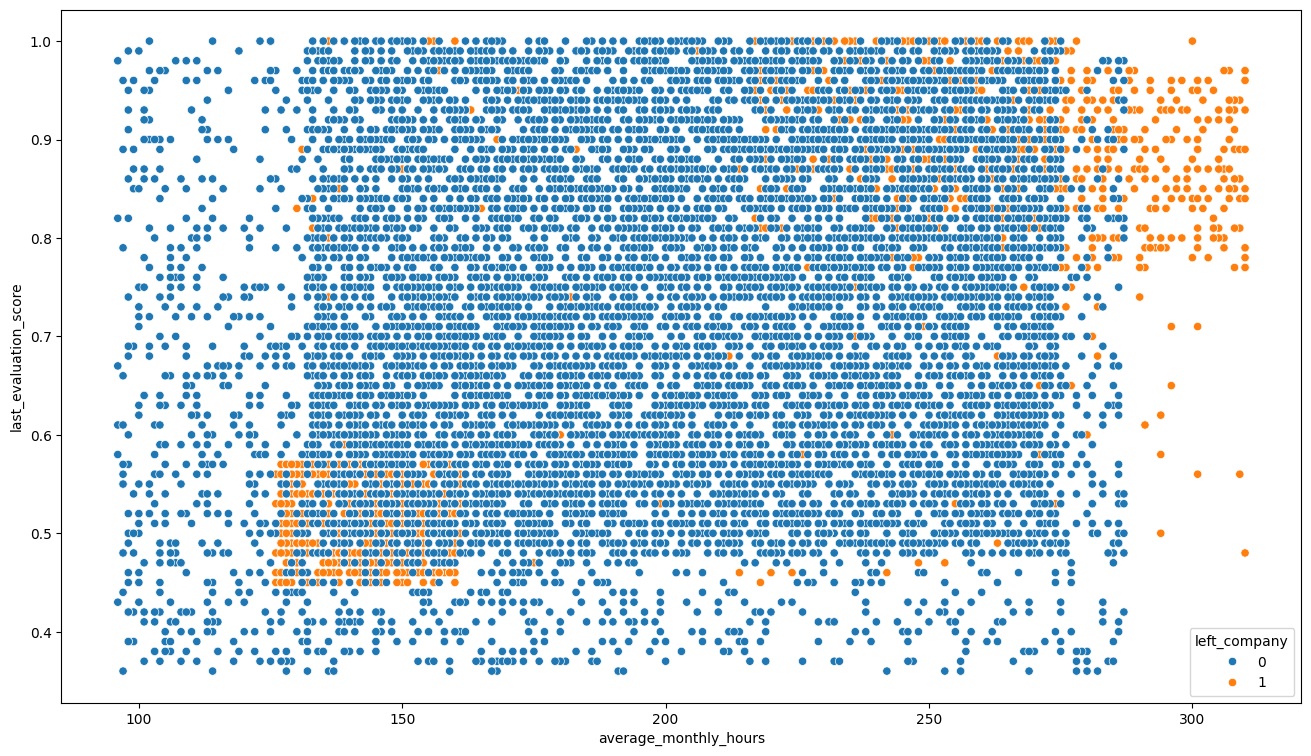

In [30]:
plt.figure(figsize=(16,9))

sns.scatterplot(data=df0_dropped_duplicates, x='average_monthly_hours', y='last_evaluation_score', hue='left_company')

plt.show()

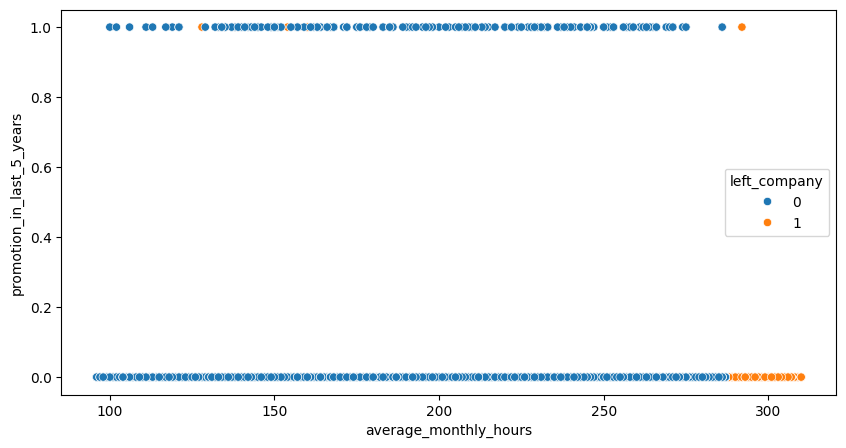

In [31]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=df0_dropped_duplicates, x='average_monthly_hours', y='promotion_in_last_5_years', hue='left_company')

plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

 - Employees who left had a lower average satisfaction score and higher average monthly working hours than those who remained in the company.

 - Ratio of employees who left the company to employees who stayed was roughly equal amongst all the departments at less than 20%.

 - Employees who left the company worked, on average, longer hours per month than employees who stayed. 

 - Employees who stayed in the company had no more than 6 projects and worked an average of less than 200 hours per month or less. Employees who left the company worked the same amount of projects as those who stayed, but but worked for longer hours. All employees who were assigned 7 projects left the company. One group of employees had few projects and worked a low number of hours per month; these employees were fired. The group with the remaining employees consisted of overworked employees who quit. 

 - Employees who left the company comprised of two groups:
    - employees who worked relatively low hours per month and had a low evaluation score
    - employees who worked long work hours and had high evaluation scores 

 - Some employees who left the company worked an average of 240-315 hours per month, explaining their very low satisfaction score. Another group of employees who left the company worked 130-160 hours per month but still had a low satisfaction score. The third group of employees who left the company worked 220-280 hours per month but had a relatively high satisfaction score in comparison to the other two groups. The shape of the distribution of this third group on the scatter plot shows signs of manipulated data. 

 - Employees who left the company had a relatively short tenure of 6 or less years. One group of employees who left had tenures between 2-4 year and had low satisfaction scores, while the other group had tenures between 5-6 years and had high satisfaction scores. Employees who had long tenures of 7 or more years all stayed in the company.

 - Salary distribution of long tenure employees was not disproportionately comprised of the high salary category.

 - There were very few employees who got promoted. Of these promoted employees, very few left. A large majority of employees who left the company did not get a promotion and worked long hours

 - 'last_evaluation_score', 'average_monthly_hours' and 'number_of_projects' had a strong correlation. 



##### List of issues
   1. long working hours
   1. high project load
   1. manipulated data
   1. low promotion rate 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. 'satisfaction_score' is more important than I thought?

2. The following independent variables, which includes encoded categorical variables, were chosen for their predictive value towards the model: 

        'satisfaction_score'
        'last_evaluation_score' 
        'number_of_projects' 
        'average_monthly_hours'
        'time_spent_in_company' 
        'work_accident'
        'promotion_in_last_5_years'
        'department_IT'
        'department_RandD'
        'department_accounting'
        'department_hr'
        'department_management'
        'department_marketing'
        'department_product_mng'
        'department_sales' 
        'department_support'
        'department_technical'
        'salary_high'
        'salary_low'
        'salary_medium'

3. For the XGBoost model, all variables are numerical and there are no missing values. 

4. Recall was chosen as the evaluation metric as the cost of a false negative was significant in the case scenario. The best recall score of the XGBoost model built was 92.90%, which was achieved after 6 iterations of hyperparameter tuning. This is a good recall score and indicates that the model correctly identifies a good proportion of employees who actually left the company. 

5. I could try more hyperparameter tuning, but the changes between successive iterations of hyperparameter already seem to plateau and will and not be worth the extra time and resources. In addition, the process of fitting the model to the data with new ranges of hyperparameters takes several minutes. This long processing time coupled with minimal changes in metric scores makes further hyperparameter tuning at this stage impractical. The model has good metric scores at the moment and I would not make further changes. 

6. VS Code as my IDE, the provided dataset, relevant python modules and functions, Github CoPilot.

7. I am concerned if my model captures enough false positives/false negatives?

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

1. binary classification task

### Identify the types of models most appropriate for this task.

1. logistic regression or tree-based models (decision tree, random forest or XGBoost)

### Modeling

Add as many cells as you need to conduct the modeling process.

In [32]:
#dummy encoding categorical variables
df0_dropped_duplicates = pd.get_dummies(df0_dropped_duplicates, columns=['department', 'salary'])


In [33]:
#assigning features and target variable to X and y
y = df0_dropped_duplicates['left_company']

X = df0_dropped_duplicates.copy()
X = X.drop(columns=['left_company'], axis=1)

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=35, stratify=y)

In [41]:
#hyperparameter tuning
cv_params = {
    'n_estimators': [205, 206, 207, 208, 209],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None],
    'learning_rate': [0.2182, 0.2185, 0.2188, 0.2291, 0.2294, 0.2297],
    'min_child_weight': [1.1774, 1.1777, 1.180, 1.1823, 1.1826, 1.1829]}

In [42]:
#instantiate xgb classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=35)

In [43]:
#instantiate grid search object
xgb_cv = GridSearchCV(xgb, cv_params, scoring={'accuracy':'accuracy', 'precision':'precision', 'recall':'recall', 'f1':'f1'}, cv=5, n_jobs=-1, refit='recall')

In [ ]:
#fit model to data
#xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2182, 0.2185, 0.2188, 0.2291,
                                           0.2294, 0.2297],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None],
                         'min_child_weight': [1.1774, 1.1777, 1.18, 1.1823,
                                              1.1826, 1.1829],
                         'n_estimators': [205, 206, 207, 208, 209]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [ ]:
#pickle the model

path = '/Users/aronrana/Documents/Google Coursera/Google Advanced Data Analytics/Course_7'

#with open(path + 'xgb_cv_model_p.pickle', 'wb') as to_write: pickle.dump(xgb_cv, to_write)

In [ ]:
with open(path + 'xgb_cv_model_p.pickle', 'rb') as to_read: xgb_cv=pickle.load(to_read)

In [40]:
xgb_cv.best_params_

{'learning_rate': 0.2297,
 'max_depth': 2,
 'min_child_weight': 1.1829,
 'n_estimators': 209}

In [45]:
xgb_cv.best_score_

np.float64(0.9289959821328365)

In [47]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [48]:
xgb_cv_results = make_results('Tuned XGBoost', xgb_cv, metric='recall')
xgb_cv_results

,model,precision,recall,F1,accuracy
0,Tuned XGBoost,0.965888,0.928996,0.947057,0.982764


In [49]:
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

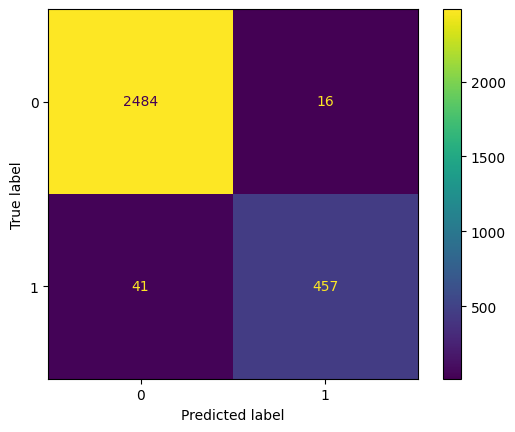

In [50]:
conf_matrix_plot(xgb_cv, X_test, y_test)

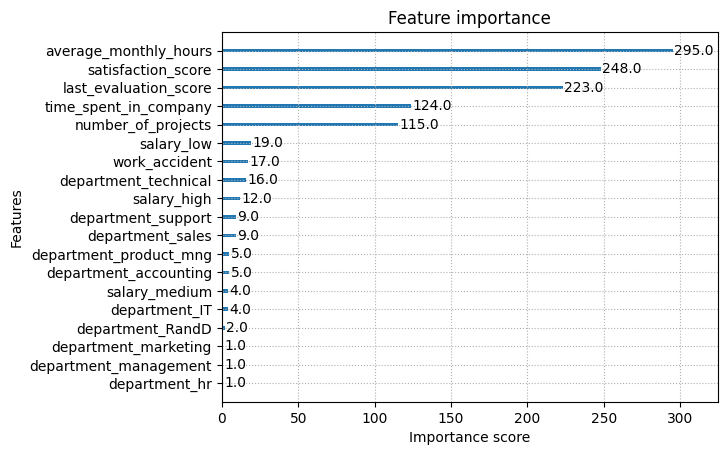

In [51]:

ax = plot_importance(xgb_cv.best_estimator_)
ax.grid(axis='y', linestyle='dotted')
ax.grid(axis='x', linestyle='dotted')

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

1. Key insights
   - approximately 83.4% of employees stayed, and approximately 16.6% of employees left
   - best parameter values include:
     - 'learning_rate' = 0.2182
     - 'max_depth' = 3
     - 'min_child_weight' = 1.1823
     - 'n_estimators' = 205
   - evaluation metrics of model with best recall score:
     - precision = 96.59%
     - recall = 92.90%
     - f1 score = 94.71%
     - accuracy = 98.28%
   - true positives and true negatives were both higher than false positives and false negatives. true negatives were higher than true positives. false negatives were higher than false positives.  
   - top 5 features in descending order:
     - 'average_monthly_hours'
     - 'satisfaction_score'
     - 'last_evaluation_score'
     - 'time_spent_in_company'
     - 'number_of_projects'

   - **actionable insights**
     1. some workers, especially those who left the company, are exposed to very *long working hours*
     1. some workers, especially those who left the company, are exposed to *high project load*
     1. there is a *low promotion rate* amongst all workers
     1. data analysis indicates possible *manipulation of data* 

2. Business recommendations
   - Limit the maximum working hours per day according to local labor policies
   - Incentivize and educate workers with overtime bonuses according to local labor policies
   - Limit the amount of projects assigned to employees
   - Incentivize workers with merit/performance based promotions
   - Conduct employee surveys to monitor the effectiveness of implemented changes
  
3. Recommendations
   - The model's evaluation metrics are good and I would recommend putting the built model into production to predict on unseen data.
   - Investigate the instances of data manipulation as identified by exploratory data analysis.

4. I could try more hyperparameter tuning, but the changes between successive iterations of hyperparameter already seem to plateau and will and not be worth the extra time and resources. In addition, the process of fitting the model to the data with new ranges of hyperparameters takes several minutes. This long processing time coupled with minimal changes in metric scores makes further hyperparameter tuning at this stage impractical. The model has good metric scores at the moment and I would not make further changes. Feature engineering could also potentially improve model performance. 

5. The feature importance plot, summary statistics of the dataset variables, and data visualizations could also provide more insight.

6. VS Code as my IDE, provided dataset, necessary python modules and functions, Github CoPilot, Google Docs, Google Slides. 

7. Model doesn't capture enough false negatives/false positives? 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

- approximately 83.4% of employees stayed, and approximately 16.6% of employees left

- best parameter values include:
   - 'learning_rate' = 0.2182
   - 'max_depth' = 3
   - 'min_child_weight' = 1.1823
   - 'n_estimators' = 205

- evaluation metrics of model with best recall score:
   - precision = 96.59%
   - recall = 92.90%
   - f1 score = 94.71%
   - accuracy = 98.28%

- true positives and true negatives were both higher than false positives and false negatives. true negatives were higher than true positives. false negatives were higher than false positives.  

- top 5 features in descending order:
   - 'average_monthly_hours'
   - 'satisfaction_score'
   - 'last_evaluation_score'
   - 'time_spent_in_company'
   - 'number_of_projects'

- ***actionable insights***
   1. some workers, especially those who left the company, are exposed to very *long working hours*
   1. some workers, especially those who left the company, are exposed to *high project load*
   1. there is a *low promotion rate* amongst all workers
   1. data analysis indicates possible *manipulation of data* 

### Conclusion, Recommendations, Next Steps

- Recommendations
   - The model's evaluation metrics are good and I would recommend putting the built model into production to predict on unseen data.
   - Investigate the instances of data manipulation as identified by exploratory data analysis.
   - Limit the maximum working hours per day according to local labor policies
   - Incentivize and educate workers with overtime bonuses according to local labor policies
   - Limit the amount of projects assigned to employees
   - Incentivize workers with merit/performance based promotions
   - Conduct employee surveys to monitor the effectiveness of implemented changes

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.

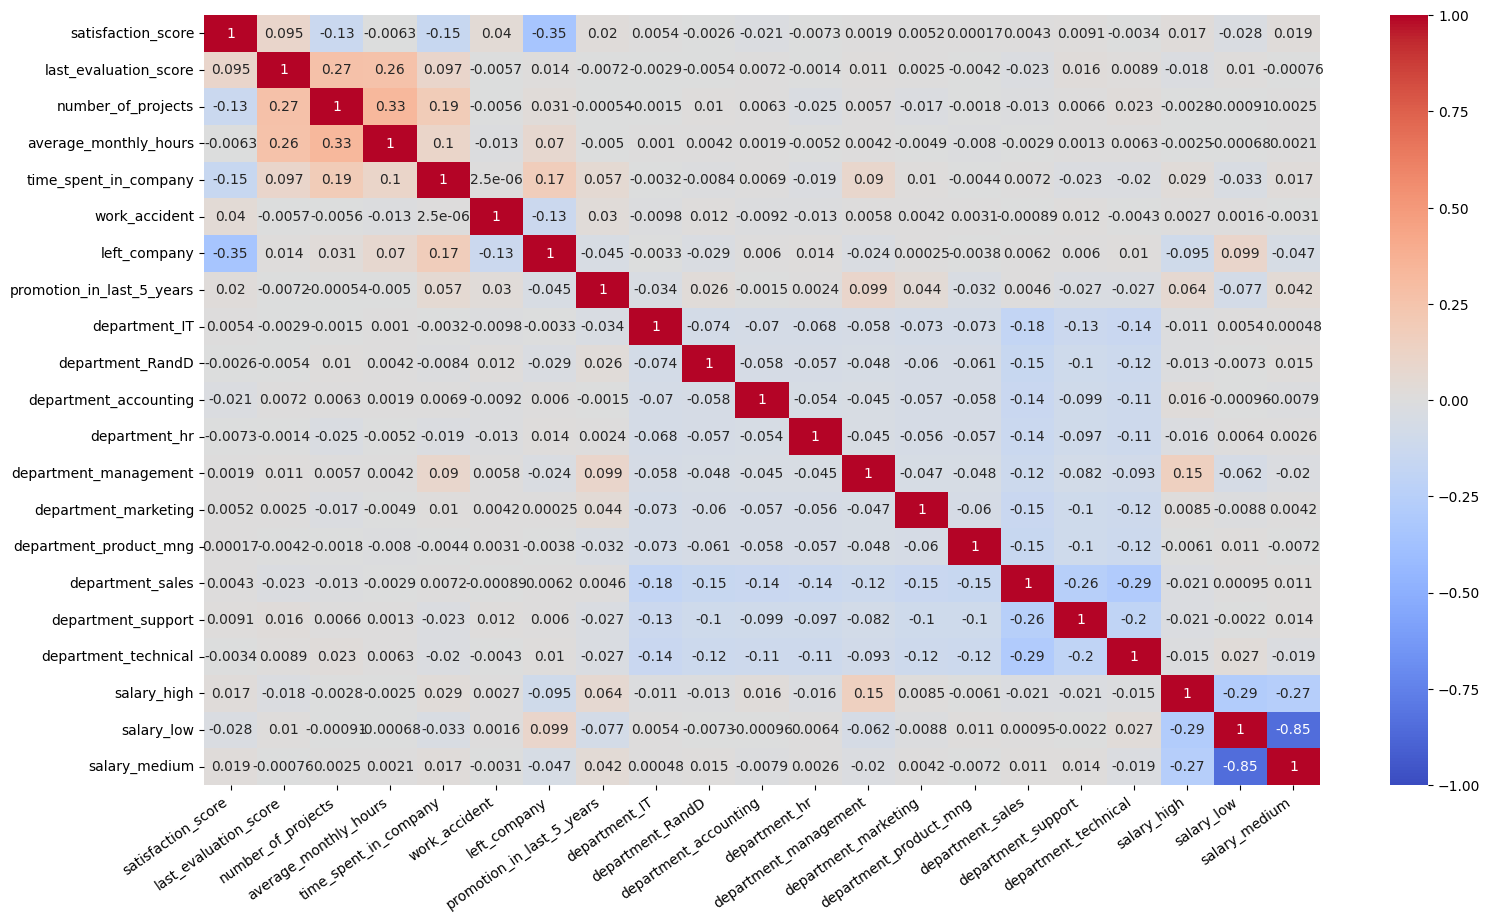

In [52]:
plt.figure(figsize=(18, 10))
sns.heatmap(df0_dropped_duplicates.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.xticks(rotation=35, horizontalalignment='right')
plt.show()